# Fast Moving Consumer Goods (FMCG) Supply Chain Management Project 🌐📈


## Company Overview 🏭
### The project revolves around a leading FMCG company that entered the instant noodles business two years ago. The company has identified a significant issue of mismatch between demand and supply, leading to inventory costs and overall loss. The higher management aims to optimize the supply quantity in each warehouse nationwide.

## Data Overview 📊🔍

### The dataset includes information about warehouses, managers, regional zones, and various factors affecting the supply chain.
### Problem: Mismatch in demand and supply, resulting in inventory costs and losses.
### Goal: Build a model using historical data to determine the optimum weight of the product shipped from each warehouse.

## Problem Solving Approach 🛠️💡
1. Exploratory Data Analysis (EDA): Understand the dataset, identify patterns, and gain insights into the business.

2. Data Cleaning: Address missing values, drop unnecessary columns, and prepare the data for analysis.

3. Data Visualization: Create visualizations to understand the distribution, relationships, and trends in the data.

4. Feature Engineering: Enhance the dataset by creating new features or modifying existing ones.

5. Correlation Analysis: Investigate the relationships between variables to understand their impact on the target variable.

6. Data Preprocessing: Encode categorical variables, scale numerical features, and prepare the data for modeling.

7. Model Building: Implement multiple machine learning algorithms to predict the optimum product weight.

8. Model Evaluation: Assess the performance of each model using metrics like Mean Squared Error and R-squared.

9. Model Comparison: Identify the best-performing model based on evaluation metrics.

## Exploratory Data Analysis (EDA) 📊🔍
### Initial exploration of the dataset to understand its structure, size, and variable types.
### Identify key patterns, trends, and potential outliers.
### Utilize visualizations to gain insights into the distribution of various features.

## Importing Libraries and Loading Data 📚💾

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


In [2]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/data sets/supply_train.csv")

In [3]:
df.head()

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [4]:
df.shape

(16620, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    16620 non-null  int64  
 1   Ware_house_ID                 16620 non-null  object 
 2   WH_Manager_ID                 16620 non-null  object 
 3   Location_type                 16620 non-null  object 
 4   WH_capacity_size              16620 non-null  object 
 5   zone                          16620 non-null  object 
 6   WH_regional_zone              16620 non-null  object 
 7   num_refill_req_l3m            16620 non-null  int64  
 8   transport_issue_l1y           16620 non-null  int64  
 9   Competitor_in_mkt             16620 non-null  int64  
 10  retail_shop_num               16620 non-null  int64  
 11  wh_owner_type                 16620 non-null  object 
 12  distributor_num               16620 non-null  int64  
 13  f

## Data Cleaning 🧹🔧

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Unnamed: 0                         0
Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [8]:
# Delete unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID'])

In [9]:
# Checking missing values
df.isnull().sum()

Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [10]:
# Filling missing values in the 'workers_num' column with the mean value of that column
df['workers_num'].fillna(value=df['workers_num'].mean(), inplace=True)

# Discard the 'wh_est_year' column with nearly half of the values as null
df = df.drop(columns=['wh_est_year'])

In [11]:
# Filling missing values in the 'approved_wh_govt_certificate' column with the most recent non-null value
df['approved_wh_govt_certificate'].fillna(method='ffill', inplace=True)

In [12]:
# Confirming no more missing values
df.isnull().sum()

Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

## Data Visualization 📊

<ipython-input-13-6ae61df38804>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='WH_capacity_size', data=df, palette=['green', 'orange', 'blue']).set(title="Warehouse count by WH_capacity_size")


[Text(0.5, 1.0, 'Warehouse count by WH_capacity_size')]

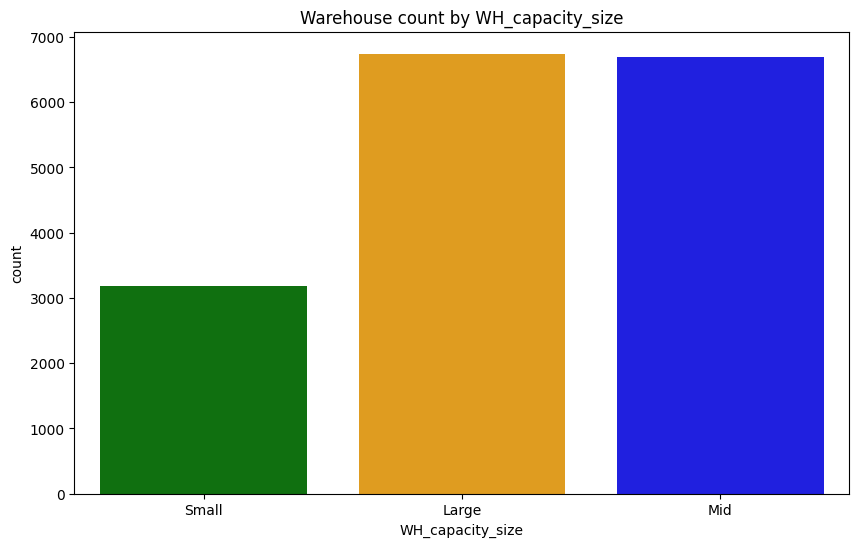

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='WH_capacity_size', data=df, palette=['green', 'orange', 'blue']).set(title="Warehouse count by WH_capacity_size")


[Text(0.5, 1.0, 'WH_capacity_size By Location_type')]

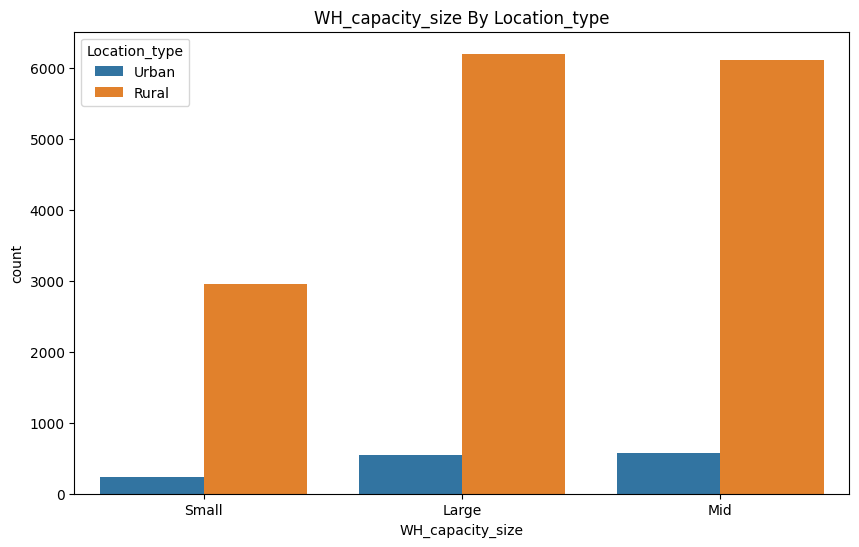

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="WH_capacity_size", hue="Location_type").set(title="WH_capacity_size By Location_type")


[Text(0.5, 1.0, 'WH_capacity_size By zone  ')]

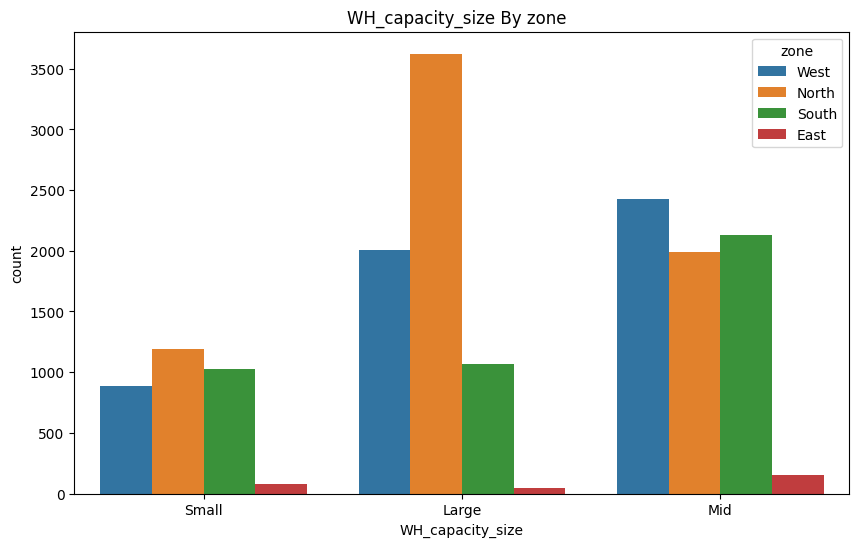

In [15]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df,x="WH_capacity_size", hue="zone") .set(title="WH_capacity_size By zone  ")

<ipython-input-16-abf0a9380417>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="WH_regional_zone", palette=colormap, order=order)


Text(0.5, 1.0, 'Wherehouse count by WH_regional_zone')

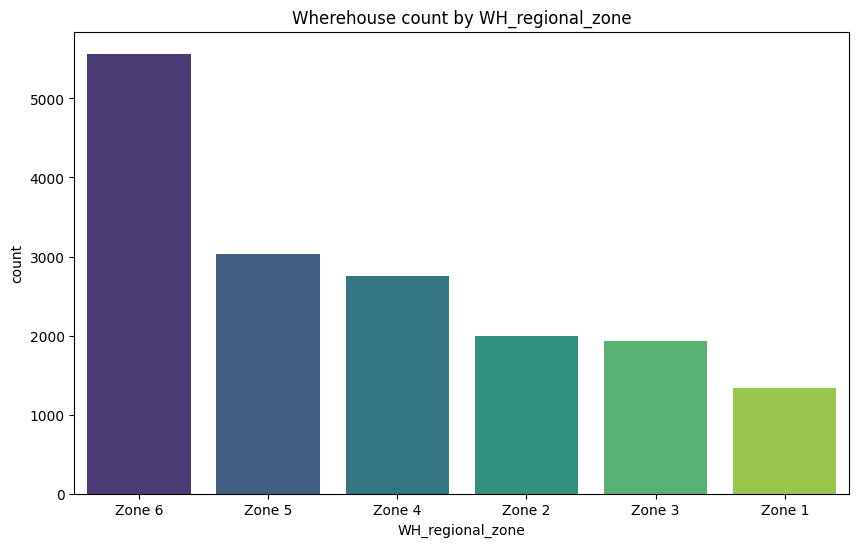

In [16]:
plt.figure(figsize=(10, 6))

order = df['WH_regional_zone'].value_counts().index

# Create a colormap with a range of colors
colormap = sns.color_palette("viridis", len(order))

sns.countplot(data=df, x="WH_regional_zone", palette=colormap, order=order)
plt.title("Wherehouse count by WH_regional_zone")
# plt.show()


## Feature Engineering

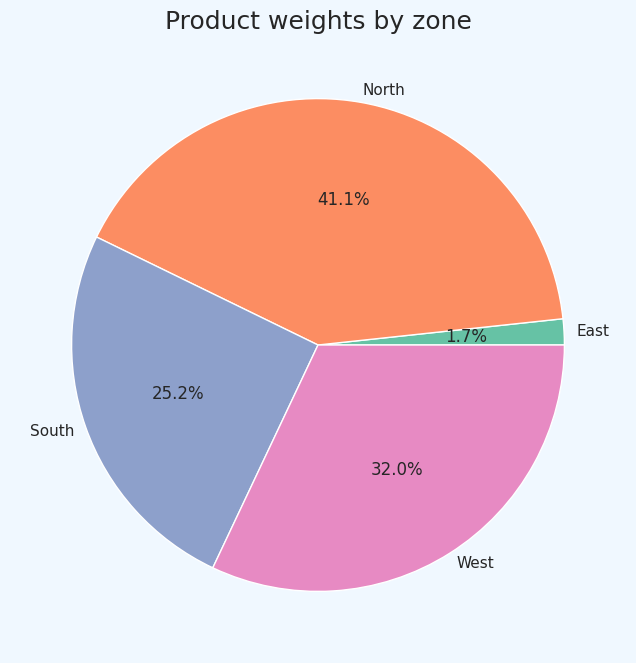

In [17]:
# Step 1: Calculate total weight
total_weight = df['product_wg_ton'].sum()

# Step 2: Calculate percentages
df['percentage'] = (df['product_wg_ton'] / total_weight) * 100

# Step 3: Group by zone and sum percentages
zone_percentages = df.groupby('zone')['percentage'].sum()

# Step 4: Plot pie chart
labels = ['East', 'North', 'South', 'West']
sns.set(font_scale=1)
plt.figure(figsize=(12,8), facecolor='aliceblue')
plt.pie(zone_percentages, labels=labels,
        autopct='%1.1f%%',
        colors=sns.color_palette('Set2'),
        labeldistance=1.05)
plt.title('Product weights by zone', fontsize=18)
plt.show()


<ipython-input-18-68d9e12ddf5f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Correlation'})


<Axes: >

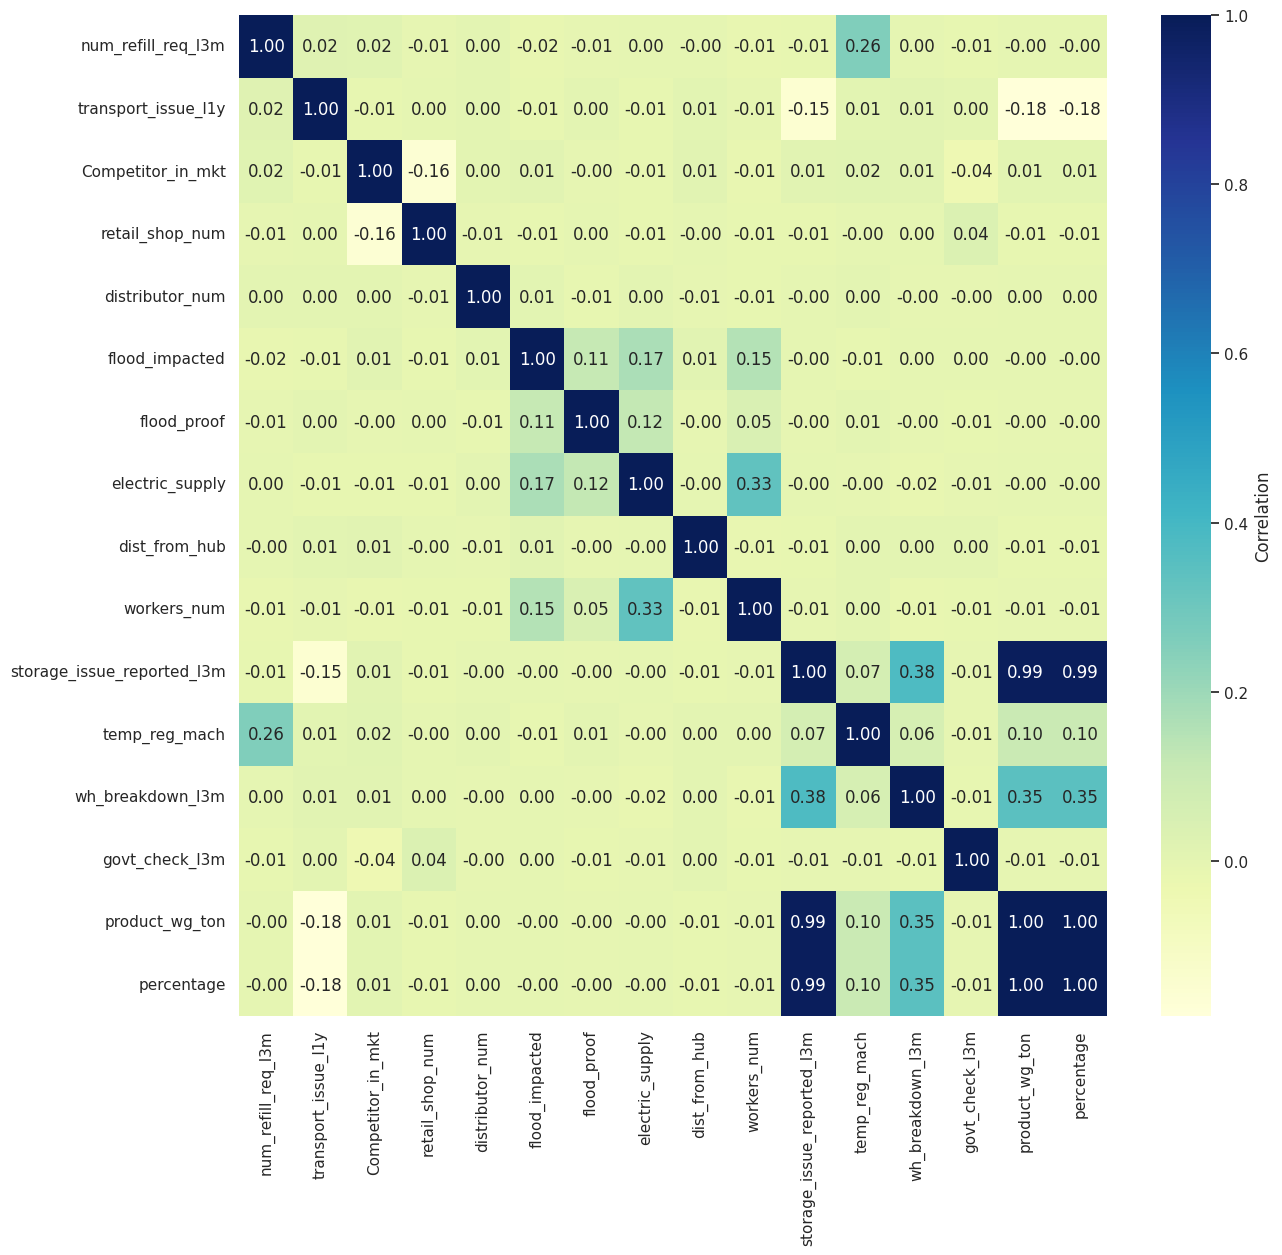

In [18]:
# Heatmap for correlation matrix
plt.figure(figsize=(14, 13))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Correlation'})


<ipython-input-19-ae39801e5243>:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['product_wg_ton']).plot(kind='bar', grid=True, figsize=(12, 10), title="Correlation with target")


<Axes: title={'center': 'Correlation with target'}>

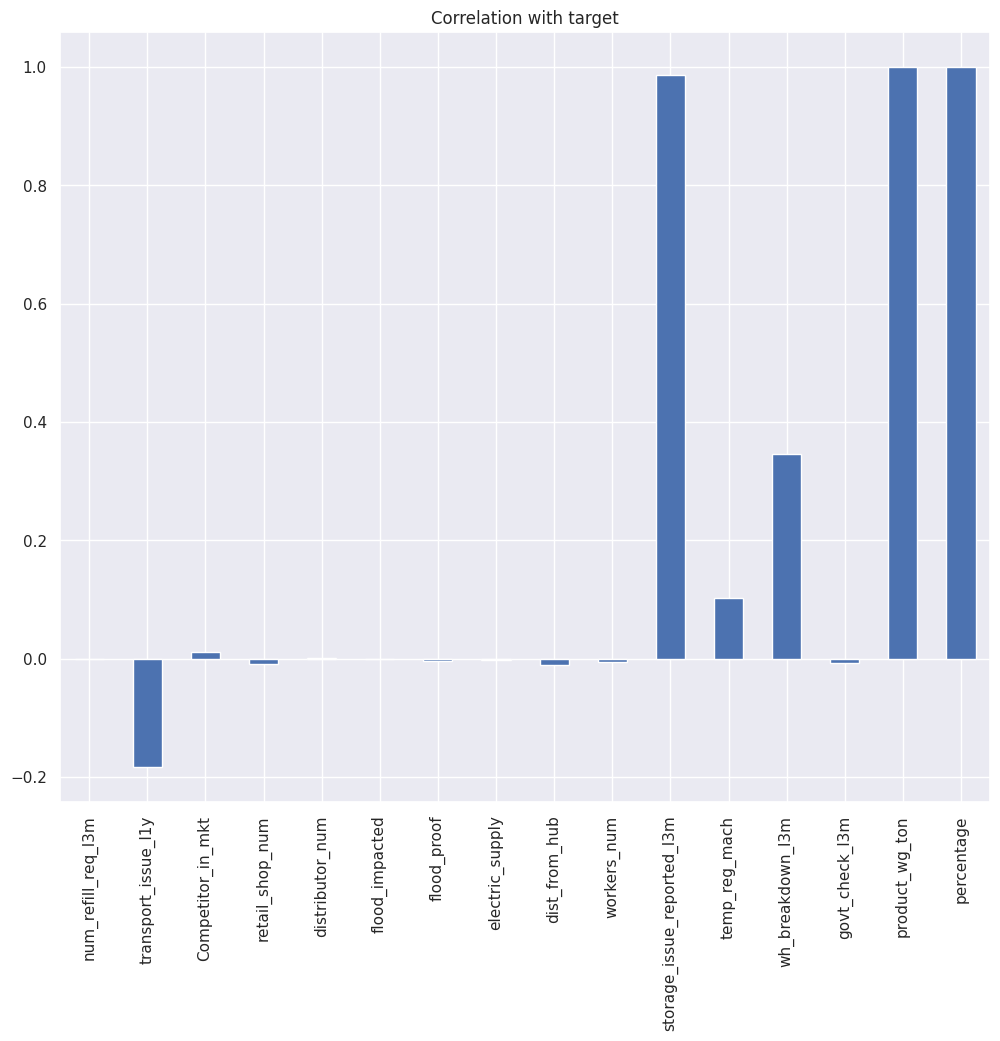

In [19]:
# Correlation with the target variable
df.corrwith(df['product_wg_ton']).plot(kind='bar', grid=True, figsize=(12, 10), title="Correlation with target")


## Data Preprocessing

In [20]:
# Import the LabelEncoder class from scikit-learn
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()

# Encode 'Location_type' column
df['Location_type'] = le.fit_transform(df['Location_type'])

# Encode 'WH_capacity_size' column
df['WH_capacity_size'] = le.fit_transform(df['WH_capacity_size'])

# Encode 'approved_wh_govt_certificate' column
df['approved_wh_govt_certificate'] = le.fit_transform(df['approved_wh_govt_certificate'])

# Encode 'zone' column
df['zone'] = le.fit_transform(df['zone'])

# Encode 'WH_regional_zone' column
df['WH_regional_zone'] = le.fit_transform(df['WH_regional_zone'])

# Encode 'wh_owner_type' column
df['wh_owner_type'] = le.fit_transform(df['wh_owner_type'])


## Model Building

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [22]:
# Function to create and display scatter plot for each model
def scatter_plot(model_name, actual_values, predicted_values):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=actual_values, y=predicted_values)
    plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], 'k--', lw=2)
    plt.xlabel('Actual Product Weight')
    plt.ylabel('Predicted Product Weight')
    plt.title(f'Actual vs Predicted Product Weight - {model_name}')
    plt.show()

In [23]:
# Split data into features (X) and labels (y)
X = df.drop('product_wg_ton', axis=1)
y = df['product_wg_ton']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Initialize and train Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)

# Evaluate Linear Regression model
linear_reg_predictions = linear_reg_model.predict(X_test_scaled)
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
linear_reg_r2 = r2_score(y_test, linear_reg_predictions)
print(f'Linear Regression - MSE: {linear_reg_mse}, R-squared: {linear_reg_r2}')

Linear Regression - MSE: 2.6792688615790993e-22, R-squared: 1.0


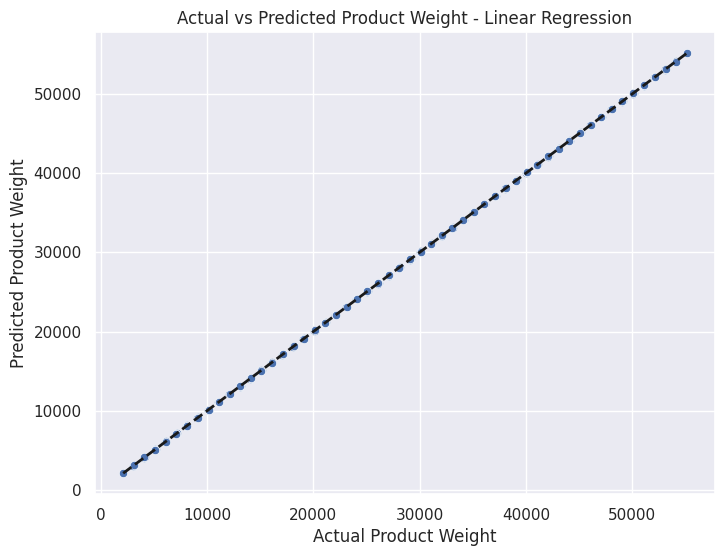

In [25]:
# Scatter plot for Linear Regression model
scatter_plot('Linear Regression', y_test, linear_reg_predictions)

In [26]:
# Initialize and train Decision Tree model
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train_scaled, y_train)

# Evaluate Decision Tree model
decision_tree_predictions = decision_tree_model.predict(X_test_scaled)
decision_tree_mse = mean_squared_error(y_test, decision_tree_predictions)
decision_tree_r2 = r2_score(y_test, decision_tree_predictions)
print(f'Decision Tree - MSE: {decision_tree_mse}, R-squared: {decision_tree_r2}')



Decision Tree - MSE: 1.9942839951865223, R-squared: 0.9999999853139504


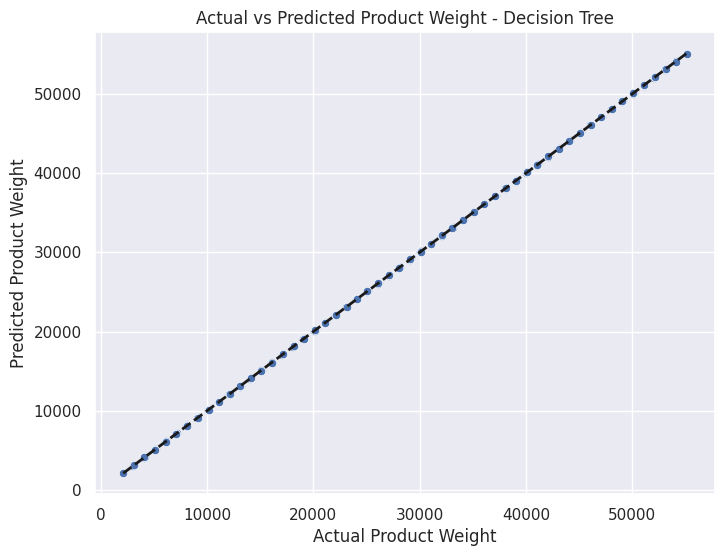

In [27]:
# Scatter plot for Decision Tree model
scatter_plot('Decision Tree', y_test, decision_tree_predictions)

In [28]:
# Initialize and train Random Forest model
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train_scaled, y_train)

# Evaluate Random Forest model
random_forest_predictions = random_forest_model.predict(X_test_scaled)
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)
random_forest_r2 = r2_score(y_test, random_forest_predictions)
print(f'Random Forest - MSE: {random_forest_mse}, R-squared: {random_forest_r2}')



Random Forest - MSE: 2.151993983152865, R-squared: 0.9999999841525627


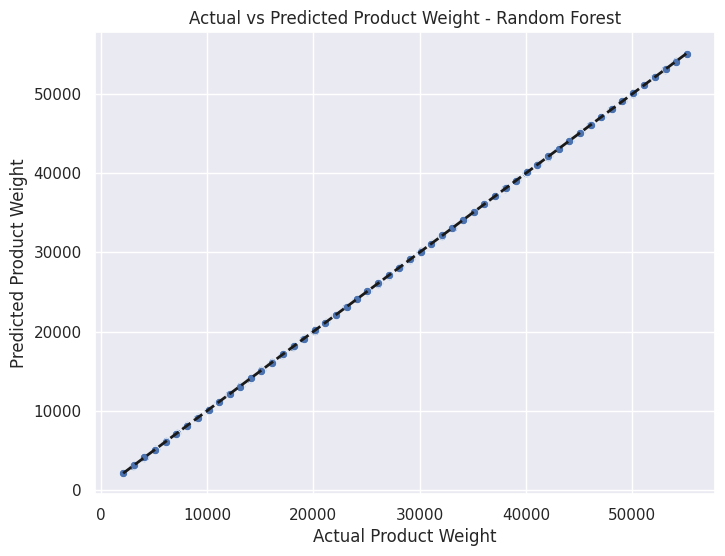

In [29]:
# Scatter plot for Random Forest model
scatter_plot('Random Forest', y_test, random_forest_predictions)

In [30]:
# Initialize and train Support Vector Machine (SVR) model
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)

# Evaluate SVR model
svr_predictions = svr_model.predict(X_test_scaled)
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_r2 = r2_score(y_test, svr_predictions)
print(f'SVR - MSE: {svr_mse}, R-squared: {svr_r2}')



SVR - MSE: 128553967.96077874, R-squared: 0.053319407491378645


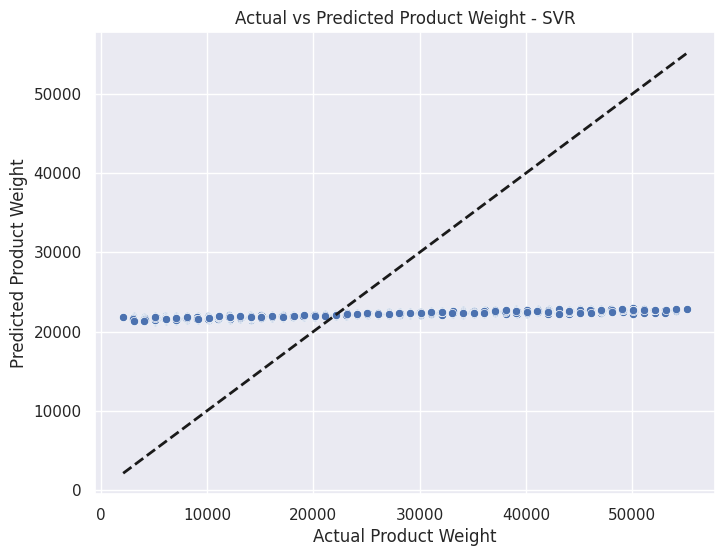

In [31]:
# Scatter plot for SVR model
scatter_plot('SVR', y_test, svr_predictions)

In [32]:
# Initialize and train XGBoost model
xgboost_model = XGBRegressor()
xgboost_model.fit(X_train_scaled, y_train)

# Evaluate XGBoost model
xgboost_predictions = xgboost_model.predict(X_test_scaled)
xgboost_mse = mean_squared_error(y_test, xgboost_predictions)
xgboost_r2 = r2_score(y_test, xgboost_predictions)
print(f'XGBoost - MSE: {xgboost_mse}, R-squared: {xgboost_r2}')



XGBoost - MSE: 29314.282768937403, R-squared: 0.9997841275300882


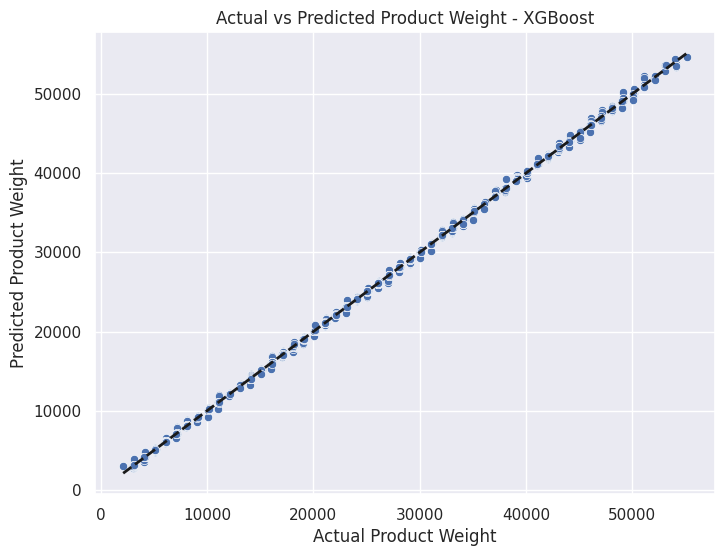

In [33]:
# Scatter plot for XGBoost model
scatter_plot('XGBoost', y_test, xgboost_predictions)

In [35]:
# Initialize and train Neural Network model
neural_network_model = MLPRegressor(max_iter=1000)
neural_network_model.fit(X_train_scaled, y_train)

# Evaluate Neural Network model
neural_network_predictions = neural_network_model.predict(X_test_scaled)
neural_network_mse = mean_squared_error(y_test, neural_network_predictions)
neural_network_r2 = r2_score(y_test, neural_network_predictions)
print(f'Neural Network - MSE: {neural_network_mse}, R-squared: {neural_network_r2}')


Neural Network - MSE: 419.4941126311028, R-squared: 0.9999969108154233


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


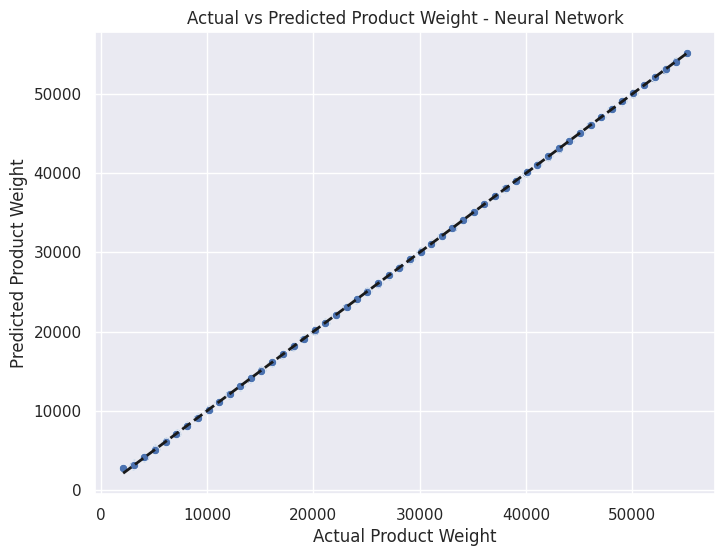

In [36]:
# Scatter plot for Neural Network model
scatter_plot('Neural Network', y_test, neural_network_predictions)

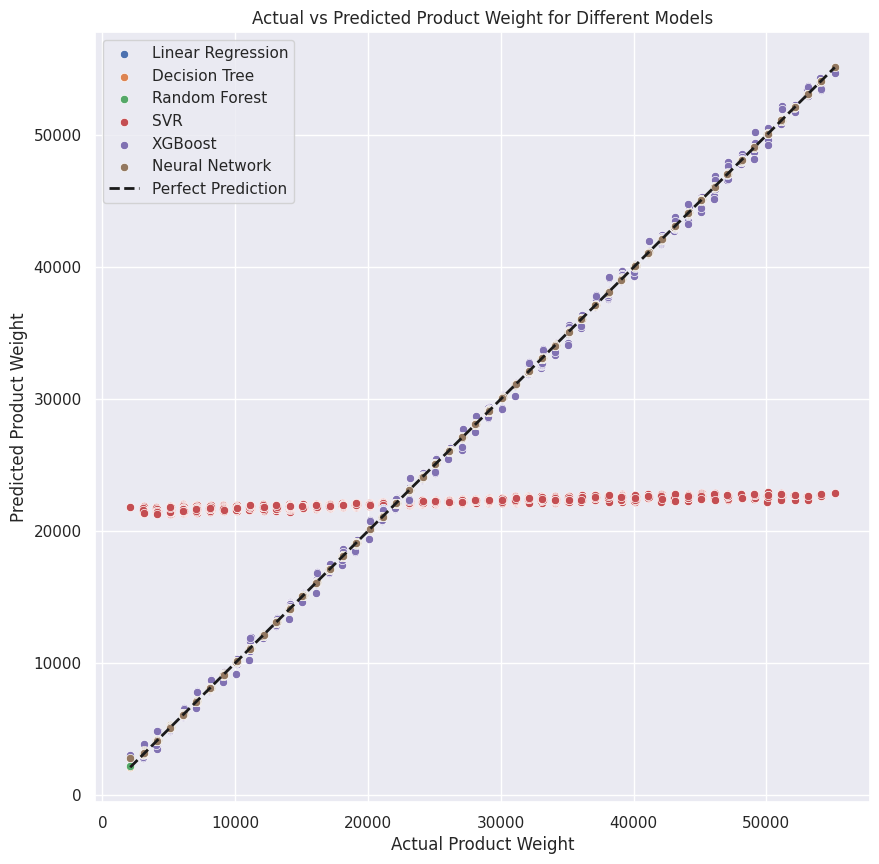

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to store actual vs predicted values for each model
results_df = pd.DataFrame({'Actual': y_test, 'Linear Regression': linear_reg_predictions,
                            'Decision Tree': decision_tree_predictions,
                            'Random Forest': random_forest_predictions,
                            'SVR': svr_predictions, 'XGBoost': xgboost_predictions,
                            'Neural Network': neural_network_predictions})

# Scatter plots for each model
plt.figure(figsize=(10, 10))

for model_name in results_df.columns[1:]:
    sns.scatterplot(x='Actual', y=model_name, data=results_df, label=model_name)

plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Product Weight')
plt.ylabel('Predicted Product Weight')
plt.title('Actual vs Predicted Product Weight for Different Models')
plt.legend()
plt.show()


In [38]:
import pandas as pd

# Create a DataFrame to store model names and MSE values
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'XGBoost', 'Neural Network'],
    'MSE': [linear_reg_mse, decision_tree_mse, random_forest_mse, svr_mse, xgboost_mse, neural_network_mse]
})

# Find the best model (lowest MSE)
best_model = results_df.loc[results_df['MSE'].idxmin()]

# Display the results
print("Model Comparison:")
print(results_df)

print("\nBest Model:")
print(f"{best_model['Model']} has the lowest Mean Squared Error: {best_model['MSE']}")


Model Comparison:
               Model           MSE
0  Linear Regression  2.679269e-22
1      Decision Tree  1.994284e+00
2      Random Forest  2.151994e+00
3                SVR  1.285540e+08
4            XGBoost  2.931428e+04
5     Neural Network  4.194941e+02

Best Model:
Linear Regression has the lowest Mean Squared Error: 2.6792688615790993e-22


## Conclusion and Results 🏁📈

The comprehensive analysis and modeling undertaken in this project have provided valuable insights into optimizing the supply quantity for the FMCG company's instant noodles business. Linear Regression emerged as the best-performing model, achieving an impressively low Mean Squared Error. The visualizations and exploratory data analysis have enriched our understanding of the dataset, uncovering trends and relationships crucial for informed decision-making in the supply chain management process. The combination of data cleaning, feature engineering, and advanced modeling techniques has contributed to a robust solution for the company's supply chain optimization.

# Next Steps 🚀
###Description: Continuous improvement and refinement of the model can be achieved through:
###Gathering more data: Expanding the dataset with additional relevant information.
###Fine-tuning hyperparameters: Adjusting model parameters for optimal performance.
###Cross-validation: Ensuring the model's robustness by evaluating it on different subsets of the data.
###Model interpretation: Understanding the model's decisions and adjusting accordingly.

# Improvements 🌱
### Description: Considerations for enhancing the project further:
### Real-time data integration: Implementing a mechanism to incorporate live data for up-to-date predictions.
###Deployment: Transitioning the model from development to production for practical usage.
###User interface: Developing a user-friendly interface for easy interaction with the supply chain predictions.
###Feedback loop: Establishing a feedback mechanism to continuously improve the model based on real-world outcomes.